In [29]:
%load_ext autoreload
%autoreload 2

from torch import nn
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from TCN_jordan import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
data=pd.read_csv(r'Dataset/exchange_rate.csv')
data_set_train,data_set_test = data.iloc[:-34,:],data.iloc[-34:,:]

In [31]:
data_set_test

,Australia,British,Canada,China,Japan,New Zealand,Singapore,Switzerland
7554,0.746436,1.249531,0.743749,0.986295,0.144995,0.008858,0.711288,0.700697
7555,0.738662,1.248751,0.744081,0.981460,0.145258,0.008746,0.708015,0.697297
7556,0.741125,1.258970,0.750331,0.986787,0.145212,0.008743,0.706814,0.700653
7557,0.744546,1.268231,0.751933,0.989413,0.145212,0.008791,0.713496,0.704126
7558,0.745796,1.273310,0.752273,0.989609,0.145212,0.008810,0.714184,0.704722
7559,0.745045,1.273301,0.752361,0.989560,0.145212,0.008810,0.714184,0.704622
7560,0.747692,1.270810,0.753915,0.989590,0.145328,0.008761,0.713216,0.702469
7561,0.745601,1.271375,0.752615,0.990688,0.145307,0.008773,0.711592,0.704722
7562,0.747680,1.260923,0.754623,0.992812,0.145338,0.008806,0.715615,0.705015
7563,0.744602,1.256755,0.756370,0.984417,0.145351,0.008756,0.716153,0.701971


In [32]:
n_signals = 8
window_size = 32
kernel_size = 7
n_hidden_layers = 12
n_hidden_dimensions = 1
prediction_horizon = 2


model = PSTA_TCN(
        window_size=window_size,
        kernel_size=kernel_size,
        n_hidden_layers=n_hidden_layers,
        n_hidden_dimensions=n_hidden_dimensions,
        n_signals=n_signals,
        prediction_horizon=prediction_horizon,
    )

model.fit(data_set_train)

epochs 0: training_loss: 0.21108356238169185	
trigger times: 0
epochs 1: training_loss: 0.12827889545489166	
trigger times: 0
epochs 2: training_loss: 0.09782040037088476	
trigger times: 0
epochs 3: training_loss: 0.05962808619616395	
trigger times: 0
epochs 4: training_loss: 0.033397442471804255	
trigger times: 0
epochs 5: training_loss: 0.027076336460472163	
trigger times: 0
epochs 6: training_loss: 0.02547128904232029	
trigger times: 0
epochs 7: training_loss: 0.023701868477766796	
trigger times: 0
epochs 8: training_loss: 0.02193623482865297	
trigger times: 0
epochs 9: training_loss: 0.021551996895696146	
trigger times: 0
epochs 10: training_loss: 0.020155996810329164	
trigger times: 0
epochs 11: training_loss: 0.019484619791540553	
trigger times: 0
epochs 12: training_loss: 0.019733178673975043	
Trigger Times: 1
epochs 13: training_loss: 0.01821084023784783	
trigger times: 0
epochs 14: training_loss: 0.01873584789366035	
Trigger Times: 1
epochs 15: training_loss: 0.017515698432038

In [38]:
model2 = PSTA_TCN(
        window_size=window_size,
        kernel_size=kernel_size,
        n_hidden_layers=n_hidden_layers,
        n_hidden_dimensions=n_hidden_dimensions,
        n_signals=n_signals,
        prediction_horizon=prediction_horizon,
        patience=25,
        nb_epochs=200,
    )

model2.fit(data_set_train)


epochs 0: training_loss: 0.24456030408204613	
trigger times: 0
epochs 1: training_loss: 0.12353582743365886	
trigger times: 0
epochs 2: training_loss: 0.11133068408501351	
trigger times: 0
epochs 3: training_loss: 0.10563888811206414	
trigger times: 0
epochs 4: training_loss: 0.10153644064725456	
trigger times: 0
epochs 5: training_loss: 0.0981646217405796	
trigger times: 0
epochs 6: training_loss: 0.09362546607094296	
trigger times: 0
epochs 7: training_loss: 0.08647446182824797	
trigger times: 0
epochs 8: training_loss: 0.07080960463164217	
trigger times: 0
epochs 9: training_loss: 0.04125321713291993	
trigger times: 0
epochs 10: training_loss: 0.028622502145373215	
trigger times: 0
epochs 11: training_loss: 0.026355493924249025	
trigger times: 0
epochs 12: training_loss: 0.024706798179422396	
trigger times: 0
epochs 13: training_loss: 0.024319273782736163	
trigger times: 0
epochs 14: training_loss: 0.022907525806103723	
trigger times: 0
epochs 15: training_loss: 0.02182254615097733	

In [67]:
x_test=torch.from_numpy(data_set_test.iloc[:32,:].astype('float32').values)

In [68]:
sol_1=model.predict(x_test)
sol_1

outpu attention layer:  torch.Size([8, 32])
residual s shape:  torch.Size([8, 32])
y_s shape:  torch.Size([32, 1])
residual t shape:  torch.Size([32, 8])
y_t shape:  torch.Size([32, 1])


tensor([[0.5125, 0.5082]])

In [69]:
sol_2=model2.predict(x_test)
sol_2

outpu attention layer:  torch.Size([8, 32])
residual s shape:  torch.Size([8, 32])
y_s shape:  torch.Size([32, 1])
residual t shape:  torch.Size([32, 8])
y_t shape:  torch.Size([32, 1])


tensor([[0.8283, 0.7957]])

In [70]:
data_set_test

,Australia,British,Canada,China,Japan,New Zealand,Singapore,Switzerland
7554,0.746436,1.249531,0.743749,0.986295,0.144995,0.008858,0.711288,0.700697
7555,0.738662,1.248751,0.744081,0.981460,0.145258,0.008746,0.708015,0.697297
7556,0.741125,1.258970,0.750331,0.986787,0.145212,0.008743,0.706814,0.700653
7557,0.744546,1.268231,0.751933,0.989413,0.145212,0.008791,0.713496,0.704126
7558,0.745796,1.273310,0.752273,0.989609,0.145212,0.008810,0.714184,0.704722
7559,0.745045,1.273301,0.752361,0.989560,0.145212,0.008810,0.714184,0.704622
7560,0.747692,1.270810,0.753915,0.989590,0.145328,0.008761,0.713216,0.702469
7561,0.745601,1.271375,0.752615,0.990688,0.145307,0.008773,0.711592,0.704722
7562,0.747680,1.260923,0.754623,0.992812,0.145338,0.008806,0.715615,0.705015
7563,0.744602,1.256755,0.756370,0.984417,0.145351,0.008756,0.716153,0.701971


In [71]:
x_test[:,:-1].detach.plot()

AttributeError: 'Tensor' object has no attribute 'plot'

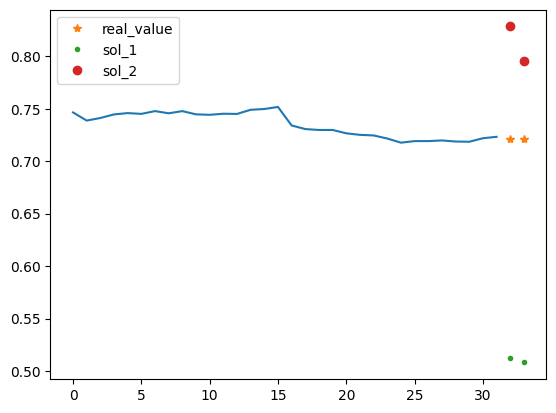

In [79]:
plt.plot(x_test[:,0])
plt.plot([32,33],data_set_test.iloc[[32,33],0],'*',label='real_value')
plt.plot([32,33],sol_1.squeeze(),'.',label='sol_1')
plt.plot([32,33],sol_2.squeeze(),'o',label='sol_2')
plt.legend()

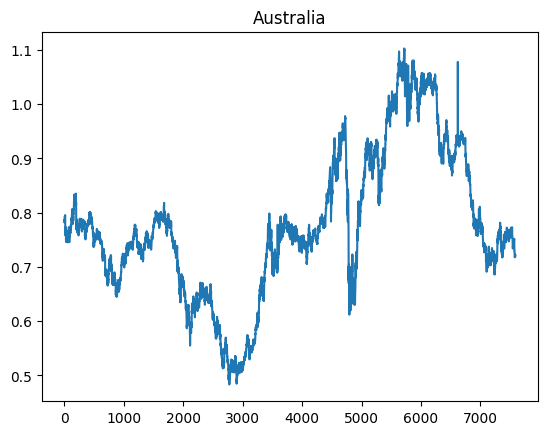

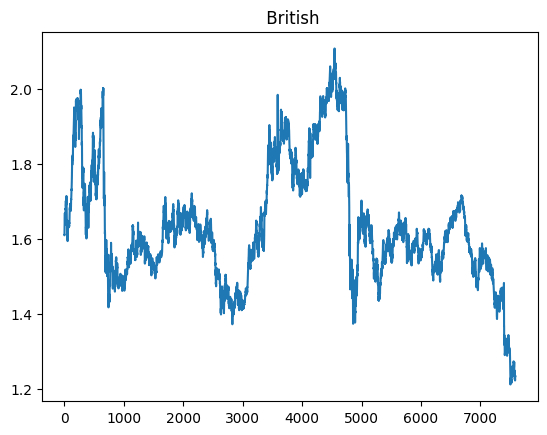

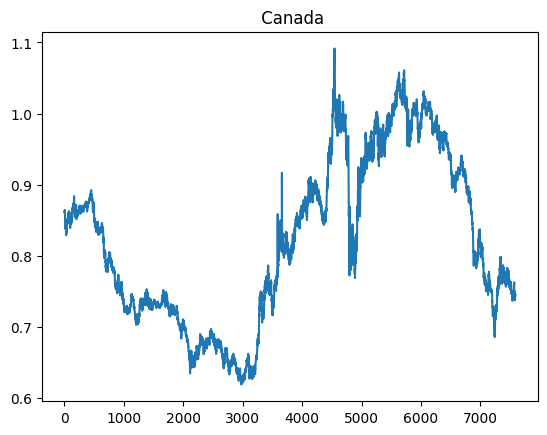

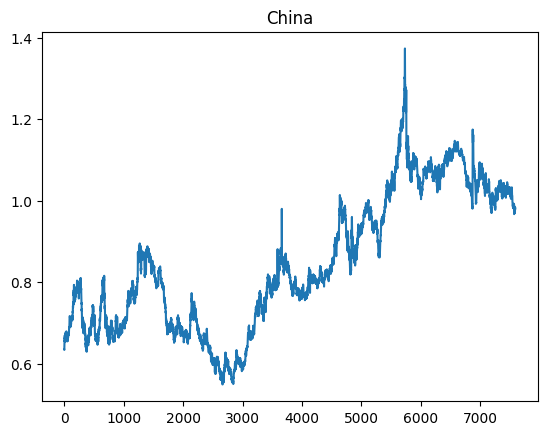

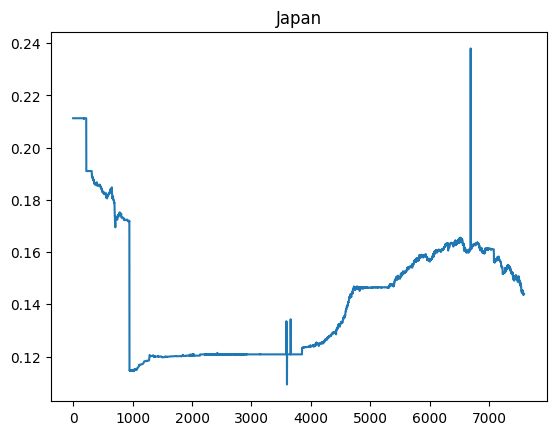

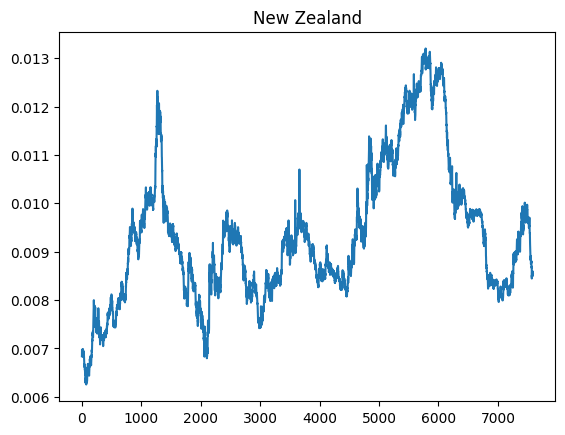

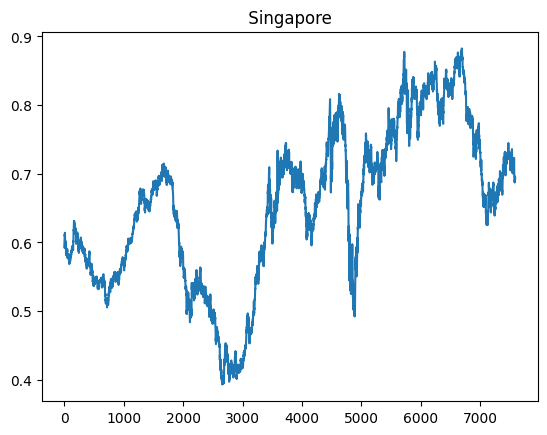

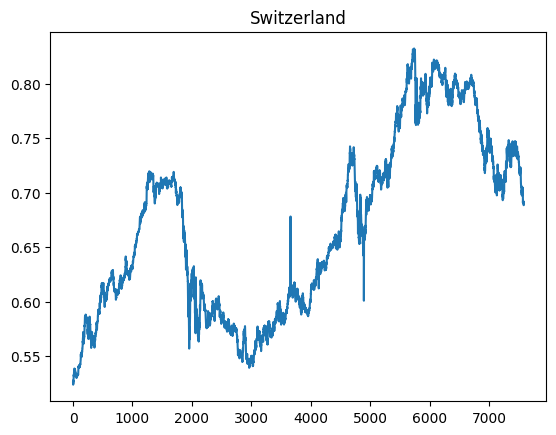

In [83]:
for col in data_set_test.columns:
        data[col].plot(title=col)
        plt.show()

In [112]:
def predict_fn(model,dataset,prediction_horizon,window_size):
        train_set = torch.from_numpy(dataset.astype('float32').values)
        train_data = [train_set[i: i + window_size] for i in range(len(train_set) - window_size)]
        point_to_plot=[]
        for i,x in enumerate(train_data):
                predictions=model.predict(x)
                point_to_plot+=[torch.Tensor([v,predictions.squeeze()[k]]) for k,v in enumerate(np.arange(i+window_size,i+window_size+prediction_horizon))]
        
        point_to_plot=torch.stack(point_to_plot)
        
        return point_to_plot
  

In [113]:
points=predict_fn(model2,data,prediction_horizon,window_size)


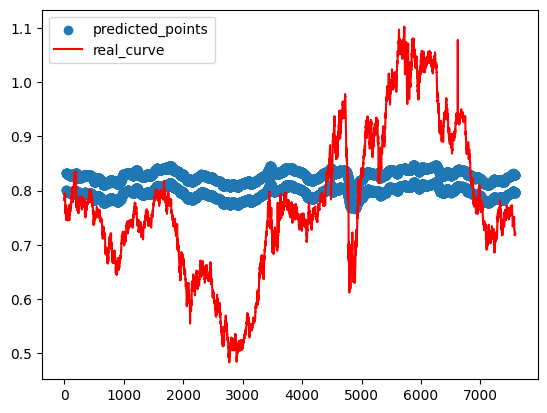

In [121]:
plt.scatter(x=points[:,0],y=points[:,1],label='predicted_points')
data.iloc[:,0].plot(label='real_curve',color='red')
plt.legend()

In [96]:
for elt in points:
        plt.scatter(x=elt[0],y=elt[1])

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7f7b21fb11f0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f7b332c8160> (for post_execute):


KeyboardInterrupt: 